In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Hàm tính khoảng cách giữa hai đường thẳng trong hệ tọa độ cực (rho, theta)
def are_lines_close(rho1, theta1, rho2, theta2, threshold_rho = 10, threshold_theta=np.pi/32):
    return abs(rho1 - rho2) < threshold_rho and abs(theta1 - theta2) < threshold_theta


In [18]:
# Ghép các đường thẳng gần nhau thành 1
def merge_lines(lines):
    if lines is None:
        return []
    
    merged_lines = []
    used = [False] * len(lines)  # Đánh dấu những đường đã sử dụng
    
    for i in range(len(lines)):
        if used[i]:
            continue
        
        rho1, theta1 = lines[i][0]
        similar_lines = [(rho1, theta1)]
        
        for j in range(i + 1, len(lines)):
            if used[j]:
                continue
            rho2, theta2 = lines[j][0]
            if are_lines_close(rho1, theta1, rho2, theta2):
                similar_lines.append((rho2, theta2))
                used[j] = True
        
        # Tính giá trị trung bình của các đường thẳng trong nhóm
        avg_rho = np.mean([l[0] for l in similar_lines])
        avg_theta = np.mean([l[1] for l in similar_lines])
        
        merged_lines.append((avg_rho, avg_theta))
    
    return merged_lines


In [38]:
def cut_horizon(img, thresh):
    # Đọc ảnh và tìm cạnh
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Sử dụng HoughLines để tìm đường thẳng
    lines = cv2.HoughLines(edges, 1, np.pi / 180, thresh)
    lines_0 = []
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            if theta < 17 * np.pi / 32 and theta > 15 * np.pi / 32:  
                lines_0.append([(rho, theta)])
                
    # Ghép các đường thẳng
    merged_lines = merge_lines(lines_0)

    # Vẽ các đường thẳng đã ghép lên hình ảnh
    img_copy = image.copy()
    if merged_lines is not None:
        for line in merged_lines:
            rho, theta = line
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 10000 * (-b))
            y1 = int(y0 + 10000 * (a))
            x2 = int(x0 - 10000 * (-b))
            y2 = int(y0 - 10000 * (a))
            cv2.line(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Hiển thị hình ảnh
    plt.figure(figsize = [16,8])
    plt.subplot(121); plt.imshow(edges, cmap="gray")
    plt.subplot(122); plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.show()
    
    r =  sorted(merged_lines, key=lambda rect: rect[0], reverse= False)
    if r[0][0] > 10:
        r.insert(0, (0, 1.5707964))
    return r

In [29]:
def cut_vertical(img, thresh):
    # Đọc ảnh và tìm cạnh
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Sử dụng HoughLines để tìm đường thẳng
    lines = cv2.HoughLines(edges, 1, np.pi / 180, thresh)
    lines_0 = []
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            if theta < 1 * np.pi / 32:
                lines_0.append([(rho, theta)])
            if theta > 31 * np.pi / 32:
                lines_0.append([(-rho, np.pi - theta)])
                
    # Ghép các đường thẳng
    merged_lines = merge_lines(lines_0)

    # Vẽ các đường thẳng đã ghép lên hình ảnh
    img_copy = image.copy()
    if merged_lines is not None:
        for line in merged_lines:
            rho, theta = line
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 10000 * (-b))
            y1 = int(y0 + 10000 * (a))
            x2 = int(x0 - 10000 * (-b))
            y2 = int(y0 - 10000 * (a))
            cv2.line(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Hiển thị hình ảnh
    plt.figure(figsize = [16,8])
    plt.subplot(121); plt.imshow(edges, cmap="gray")
    plt.subplot(122); plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.show()
    
    r = sorted(merged_lines, key=lambda rect: rect[0], reverse= False)
    if r[0][0] > 10:
        r.insert(0, (0,0))
    return r

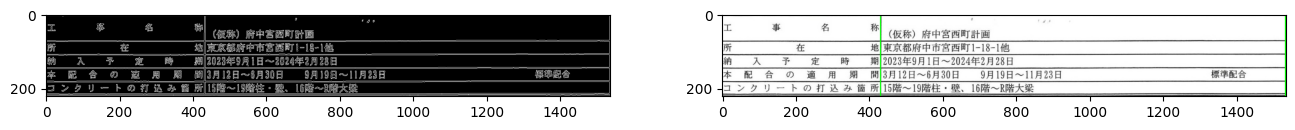

In [33]:
r = cut_vertical('cut_image_1.jpg',100)

In [34]:
image = cv2.imread('cut_image_1.jpg')
cropped_image = image[:,int(r[1][0]):,:]
cv2.imwrite(f'cut_image_1_0.jpg', cropped_image)



True

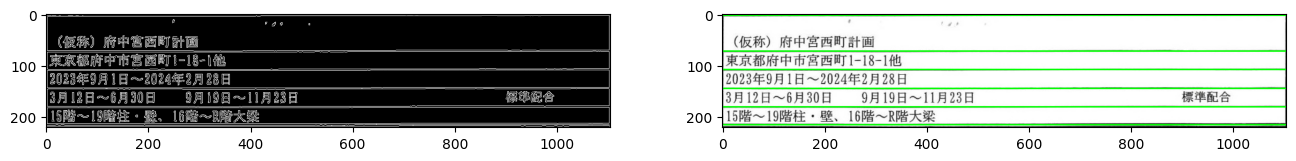

In [40]:
r = cut_horizon('cut_image_1_0.jpg',500)

In [41]:
image = cv2.imread('cut_image_1_0.jpg')
cropped_image = image[int(r[0][0]):int(r[1][0]),:,:]
cv2.imwrite(f'F.jpg', cropped_image)

cropped_image = image[int(r[1][0]):int(r[2][0]),:,:]
cv2.imwrite(f'G.jpg', cropped_image)

cropped_image = image[int(r[2][0]):int(r[3][0]),:,:]
cv2.imwrite(f'H.jpg', cropped_image)

cropped_image = image[int(r[3][0]):int(r[4][0]),:,:]
cv2.imwrite(f'I.jpg', cropped_image)

cropped_image = image[int(r[4][0]):int(r[5][0]),:,:]
cv2.imwrite(f'J.jpg', cropped_image)


True

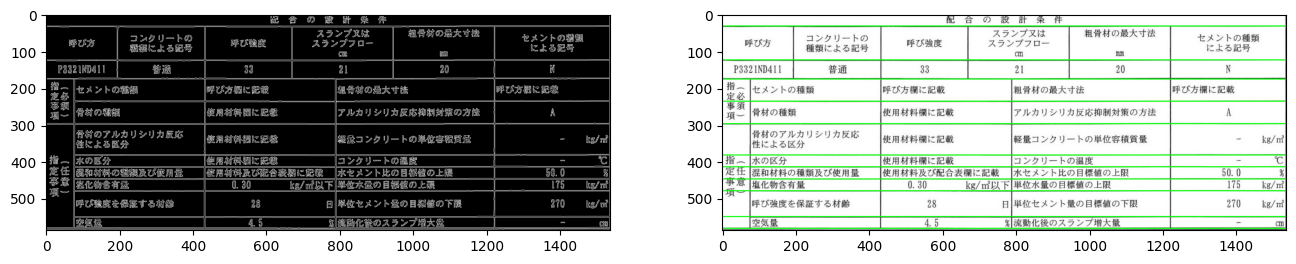

In [43]:
r = cut_horizon('cut_image_2.jpg',900)

In [44]:
image = cv2.imread('cut_image_2.jpg')
cropped_image = image[int(r[2][0]):int(r[3][0]),:,:]
cv2.imwrite(f'cut_image_2_0.jpg', cropped_image)



cropped_image = image[int(r[3][0]):,:,:]
cv2.imwrite(f'cut_image_2_1.jpg', cropped_image)

True

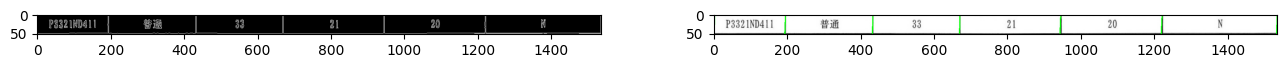

In [46]:
r = cut_vertical('cut_image_2_0.jpg',25)

In [47]:
image = cv2.imread('cut_image_2_0.jpg')

cropped_image = image[:,int(r[1][0]):int(r[2][0]),:]
cv2.imwrite(f'K.jpg', cropped_image)

cropped_image = image[:,int(r[2][0]):int(r[3][0]),:]
cv2.imwrite(f'L.jpg', cropped_image)

cropped_image = image[:,int(r[3][0]):int(r[4][0]),:]
cv2.imwrite(f'M.jpg', cropped_image)

cropped_image = image[:,int(r[4][0]):int(r[5][0]),:]
cv2.imwrite(f'N.jpg', cropped_image)

cropped_image = image[:,int(r[5][0]):int(r[6][0]),:]
cv2.imwrite(f'O.jpg', cropped_image)

True

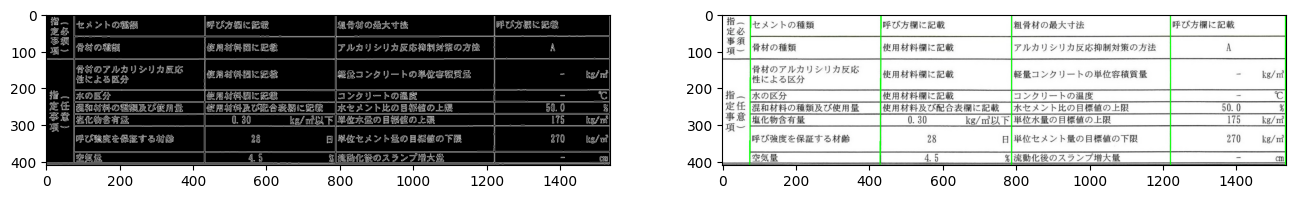

In [49]:
r = cut_vertical('cut_image_2_1.jpg',150)

In [50]:
image = cv2.imread('cut_image_2_1.jpg')
cropped_image = image[:,int(r[2][0]):int(r[3][0]),:]
cv2.imwrite(f'cut_image_2_1_0.jpg', cropped_image)

cropped_image = image[:,int(r[4][0]):,:]
cv2.imwrite(f'cut_image_2_1_1.jpg', cropped_image)



True

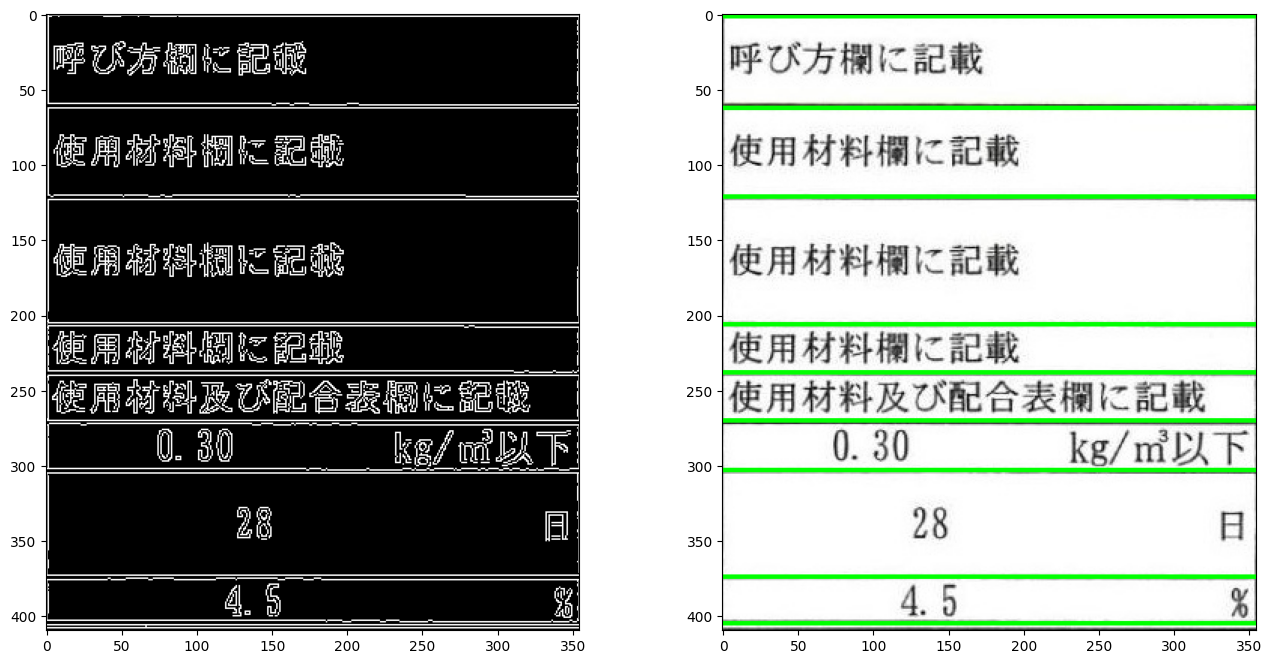

In [51]:
r = cut_horizon('cut_image_2_1_0.jpg',200)

In [52]:
image = cv2.imread('cut_image_2_1_0.jpg')
cropped_image = image[int(r[7][0]):,:,:]
cv2.imwrite(f'P.jpg', cropped_image)

True

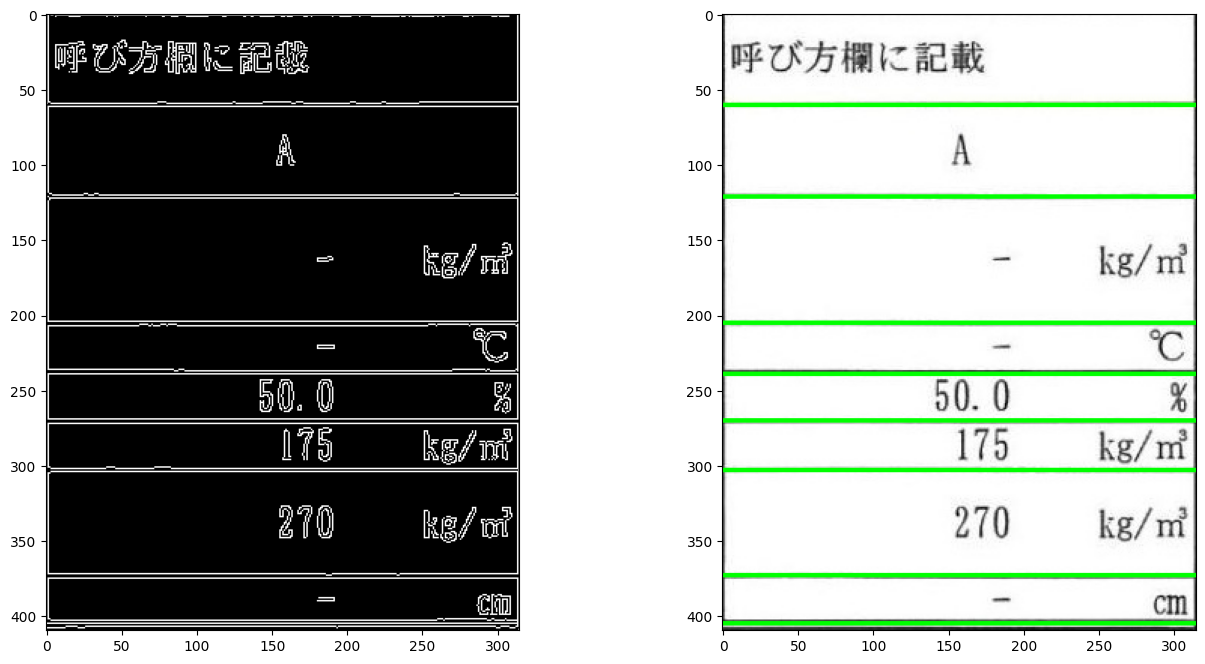

In [53]:
r = cut_horizon('cut_image_2_1_1.jpg',200)

In [54]:
image = cv2.imread('cut_image_2_1_1.jpg')

cropped_image = image[int(r[4][0]):int(r[5][0]),:,:]
cv2.imwrite(f'Q.jpg', cropped_image)

cropped_image = image[int(r[5][0]):int(r[6][0]),:,:]
cv2.imwrite(f'R.jpg', cropped_image)

cropped_image = image[int(r[6][0]):int(r[7][0]),:,:]
cv2.imwrite(f'S.jpg', cropped_image)



True

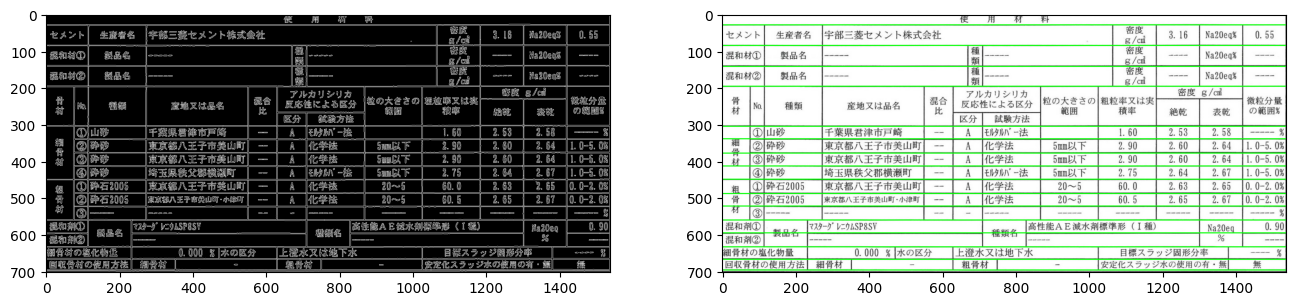

In [55]:
r = cut_horizon('cut_image_3.jpg',1000)

In [56]:
image = cv2.imread('cut_image_3.jpg')

cropped_image = image[int(r[1][0]):int(r[2][0]),:,:]
cv2.imwrite(f'cut_image_3_00.jpg', cropped_image)

cropped_image = image[int(r[2][0]):int(r[4][0]),:,:]
cv2.imwrite(f'cut_image_3_0.jpg', cropped_image)

cropped_image = image[int(r[5][0]):int(r[-3][0]),:,:]
cv2.imwrite(f'cut_image_3_1.jpg', cropped_image)


True

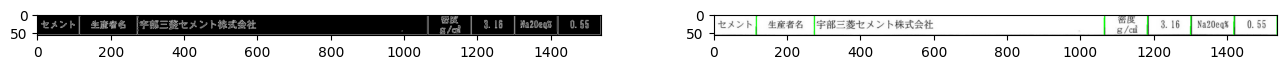

In [57]:
r=cut_vertical('cut_image_3_00.jpg',30)

In [58]:
image = cv2.imread('cut_image_3_00.jpg')
cropped_image = image[:,int(r[2][0]):int(r[3][0]),:]
cv2.imwrite(f'T.jpg', cropped_image)

True

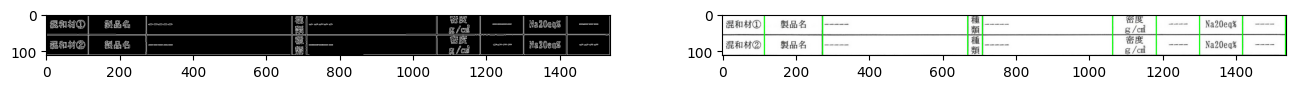

In [61]:
r1 = cut_vertical('cut_image_3_0.jpg',80)

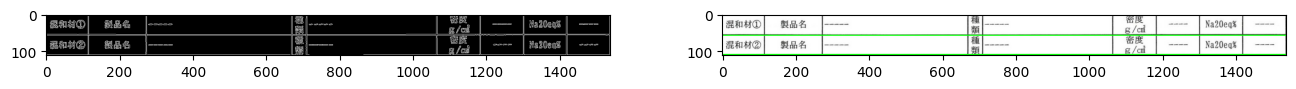

In [62]:
r2 = cut_horizon('cut_image_3_0.jpg',800)

In [63]:
image = cv2.imread('cut_image_3_0.jpg')
cropped_image = image[int(r2[0][0]):int(r2[1][0]),int(r1[2][0]):int(r1[3][0]),:]
cv2.imwrite(f'U.jpg', cropped_image)

cropped_image = image[int(r2[1][0]):,int(r1[2][0]):int(r1[3][0]),:]
cv2.imwrite(f'V.jpg', cropped_image)

cropped_image = image[int(r2[0][0]):int(r2[1][0]),int(r1[4][0]):int(r1[5][0]),:]
cv2.imwrite(f'W.jpg', cropped_image)

cropped_image = image[int(r2[1][0]):,int(r1[4][0]):int(r1[5][0]),:]
cv2.imwrite(f'X.jpg', cropped_image)



True

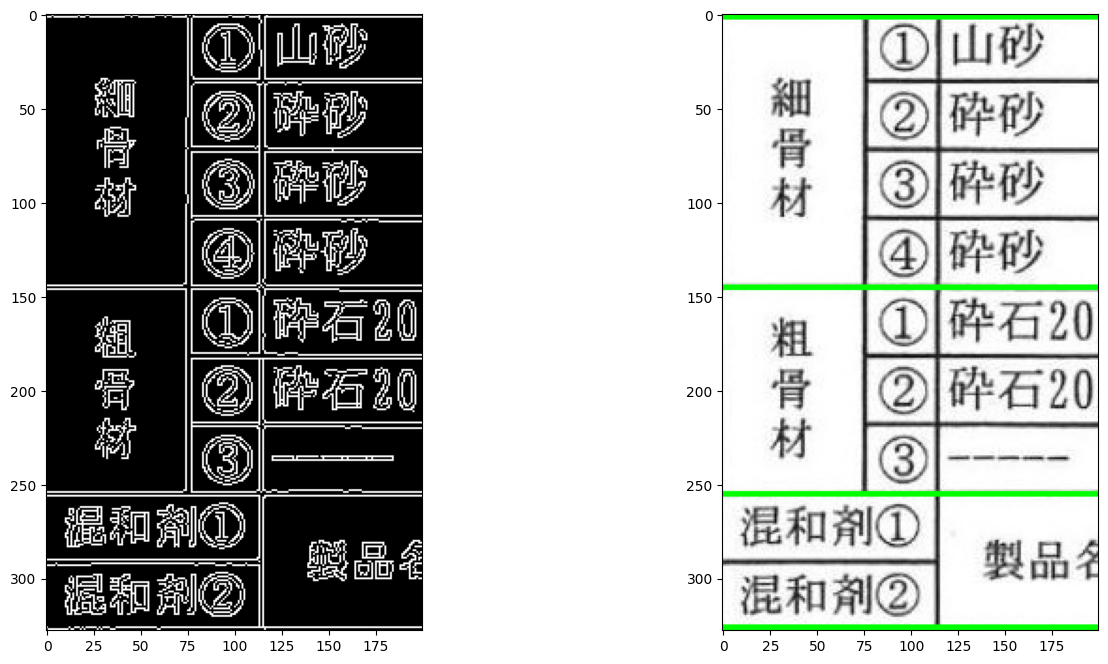

In [82]:
image = cv2.imread('cut_image_3_1.jpg')
cropped_image = image[:,:200,:]
cv2.imwrite(f'tmp.jpg', cropped_image)


r = cut_horizon('tmp.jpg',150)

In [84]:
image = cv2.imread('cut_image_3_1.jpg')
cropped_image = image[int(r[0][0]):int(r[1][0]),:,:]
cv2.imwrite(f'cut_image_3_1_0.jpg', cropped_image)

cropped_image = image[int(r[1][0]):int(r[2][0]),:,:]
cv2.imwrite(f'cut_image_3_1_1.jpg', cropped_image)

cropped_image = image[int(r[2][0]):,:,:]
cv2.imwrite(f'cut_image_3_1_2.jpg', cropped_image)



True

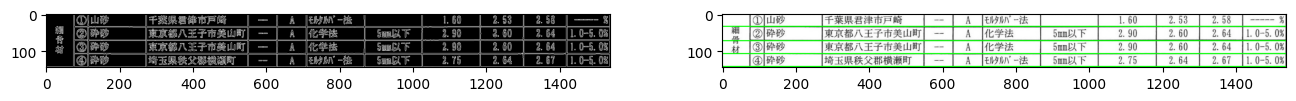

In [87]:
r1 = cut_horizon('cut_image_3_1_0.jpg',1000)

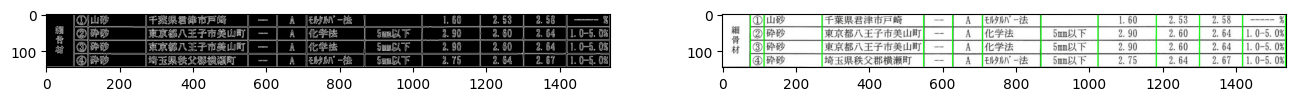

In [88]:
r2 = cut_vertical('cut_image_3_1_0.jpg',100)

In [102]:
image = cv2.imread('cut_image_3_1_0.jpg')

for i in range(4):
    try:
        # if i == 3:
        #     cropped_image = image[int(r1[i][0]):,int(r2[2][0]):int(r2[3][0]),:]
        # else:
        cropped_image = image[int(r1[i][0]):int(r1[i+1][0]),int(r2[2][0]):int(r2[3][0]),:]
    except:
        pass
    cv2.imwrite(f'1_1_{i}.jpg', cropped_image)

for i in range(4):
    try:
        # if i == 3:
        #     cropped_image = image[int(r1[i][0]):,int(r2[3][0]):int(r2[4][0]),:]
        # else:
        cropped_image = image[int(r1[i][0]):int(r1[i+1][0]),int(r2[3][0]):int(r2[4][0]),:]
    except:
        pass
    cv2.imwrite(f'1_2_{i}.jpg', cropped_image)

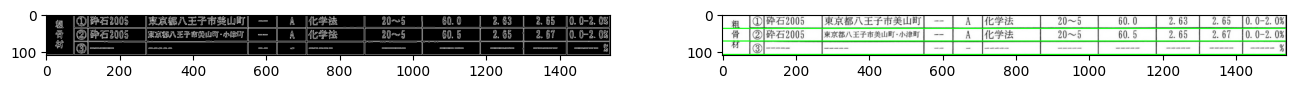

In [93]:
r1 = cut_horizon('cut_image_3_1_1.jpg',1000)

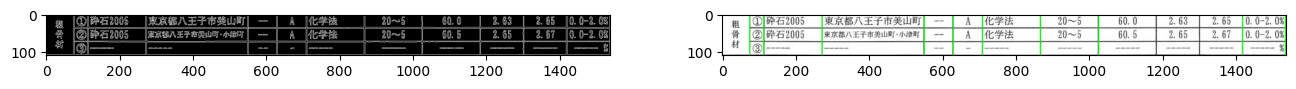

In [96]:
r2 = cut_vertical('cut_image_3_1_1.jpg',100)

In [101]:
image = cv2.imread('cut_image_3_1_1.jpg')

for i in range(4):
    try:
        # if i == 3:
        #     cropped_image = image[int(r1[i][0]):,int(r2[2][0]):int(r2[3][0]),:]
        # else:
        cropped_image = image[int(r1[i][0]):int(r1[i+1][0]),int(r2[2][0]):int(r2[3][0]),:]
    except:
        pass
    cv2.imwrite(f'2_1_{i}.jpg', cropped_image)

for i in range(4):
    try:
        # if i == 3:
        #     cropped_image = image[int(r1[i][0]):,int(r2[3][0]):int(r2[4][0]),:]
        # else:
        cropped_image = image[int(r1[i][0]):int(r1[i+1][0]),int(r2[3][0]):int(r2[4][0]),:]
    except:
        pass
    cv2.imwrite(f'2_2_{i}.jpg', cropped_image)

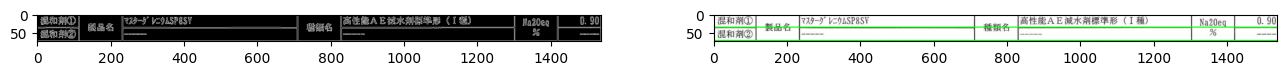

In [103]:
r1 = cut_horizon('cut_image_3_1_2.jpg',1000)

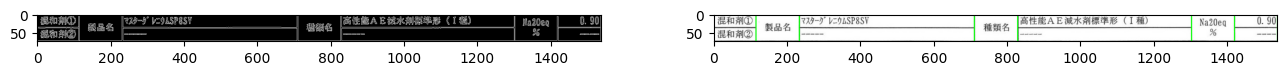

In [107]:
r2 = cut_vertical('cut_image_3_1_2.jpg',60)

In [110]:
image = cv2.imread('cut_image_3_1_2.jpg')

for i in range(3):
    try:
        # if i == 3:
        #     cropped_image = image[int(r1[i][0]):,int(r2[2][0]):int(r2[3][0]),:]
        # else:
        cropped_image = image[int(r1[i][0]):int(r1[i+1][0]),int(r2[2][0]):int(r2[3][0]),:]
    except:
        pass
    cv2.imwrite(f'3_1_{i}.jpg', cropped_image)

for i in range(3):
    try:
        # if i == 3:
        #     cropped_image = image[int(r1[i][0]):,int(r2[3][0]):int(r2[4][0]),:]
        # else:
        cropped_image = image[int(r1[i][0]):int(r1[i+1][0]),int(r2[4][0]):int(r2[5][0]),:]
    except:
        pass
    cv2.imwrite(f'3_2_{i}.jpg', cropped_image)

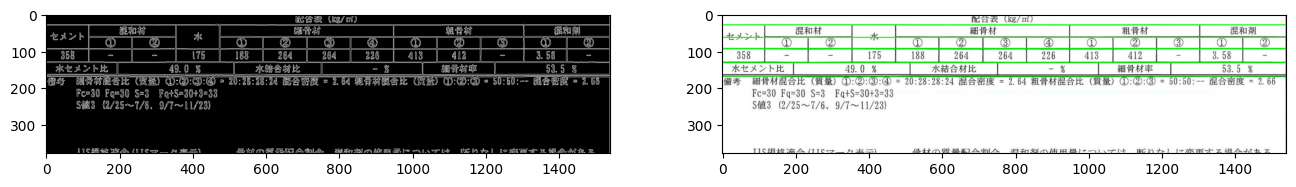

In [118]:
r = cut_horizon('cut_image_4.jpg',1000)

In [119]:
image = cv2.imread('cut_image_4.jpg')

cropped_image = image[int(r[1][0]):int(r[4][0]),:,:]
cv2.imwrite(f'cut_image_4_0.jpg', cropped_image)

cropped_image = image[int(r[4][0]):int(r[5][0]),:,:]
cv2.imwrite(f'cut_image_4_1.jpg', cropped_image)


True

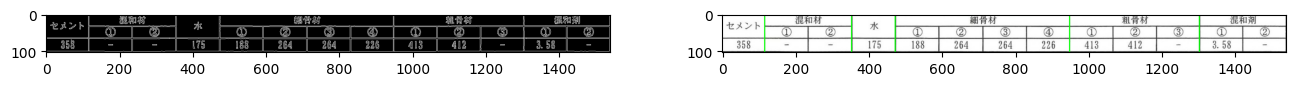

In [126]:
r1 = cut_vertical('cut_image_4_0.jpg',90)

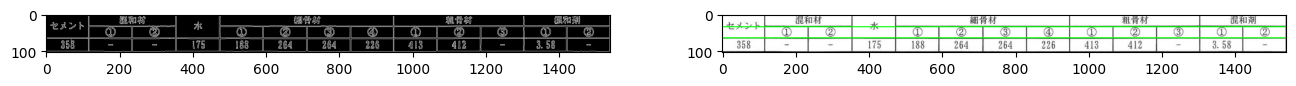

In [128]:
r2 = cut_horizon('cut_image_4_0.jpg',900)

In [131]:
image = cv2.imread('cut_image_4_0.jpg')
cropped_image = image[int(r2[2][0]):,int(r1[0][0]):int(r1[1][0]),:]
cv2.imwrite(f'AS.jpg', cropped_image)

cropped_image = image[int(r2[2][0]):,int(r1[2][0]):int(r1[3][0]),:]
cv2.imwrite(f'AV.jpg', cropped_image)



cropped_image = image[int(r2[2][0]):,int(r1[1][0]):int(r1[2][0]),:]
cv2.imwrite(f'cut_image_4_0_0.jpg', cropped_image)


cropped_image = image[int(r2[2][0]):,int(r1[3][0]):int(r1[4][0]),:]
cv2.imwrite(f'cut_image_4_0_1.jpg', cropped_image)


cropped_image = image[int(r2[2][0]):,int(r1[4][0]):int(r1[5][0]),:]
cv2.imwrite(f'cut_image_4_0_2.jpg', cropped_image)


cropped_image = image[int(r2[2][0]):,int(r1[5][0]):,:]
cv2.imwrite(f'cut_image_4_0_3.jpg', cropped_image)


True

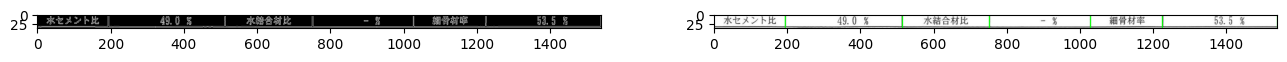

In [120]:
r = cut_vertical('cut_image_4_1.jpg',30)

In [121]:
image = cv2.imread('cut_image_4_1.jpg')
cropped_image = image[:,int(r[1][0]):int(r[2][0]),:]
cv2.imwrite(f'BF.jpg', cropped_image)

cropped_image = image[:,int(r[3][0]):int(r[4][0]),:]
cv2.imwrite(f'BG.jpg', cropped_image)

cropped_image = image[:,int(r[5][0]):,:]
cv2.imwrite(f'BH.jpg', cropped_image)

True